In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

from copy import copy
from matplotlib import gridspec
from pathlib import Path
from random import sample, choice, choices

from My_libraries.my_stats import half_frame
# from my_stats import half_frame

my_font_size = 15

# Regression

Science and engineering are about obtaining associations between multiple variables. For example, the ideal gas law relates several quantities that can be measured on a gas sample:

> $~~~~~~ PV = n R T$

for constant volume and number of moles, the equation becomes a simple linear relationship between pressure and temperature

> $~~~~~~ P = a T$

You can imagine a situation in which some 16th Century experimental physicist was trying to determine whether there is an association between $P$ and $T$ and making noisy measurements of these two quantities.

Regression analysis  is a statistical approach that is used to investigate for the existence of linear associations such as the ones described above. The basic assumption of regression analysis is that 

> $~~~~~~~ y_i = \beta_0 + \beta_1 x_i + \epsilon_i$  

So, 

> $~~~~~~~ \epsilon_i = y_i - \beta_0 - \beta_1 x_i$

where $\epsilon$ is assumed to be i.i.d. normal variables with zero mean and standard deviation $\sigma$.

If we fix the value of $X$, then we can write that

> $~~~~~~~ E[Y|X = x] = \beta_0 + \beta_1 x + E[\epsilon_i] = \beta_0 + \beta_1 x$

and that

> $~~~~~~~ E\left[(Y - E[Y|X = x])^2 ~| ~X = x \right] = E[(\epsilon_i - 0)^2] = \sigma^2$

.

.

.

.



# Least squares estimation

If we have data, $\{x_i\}$ and $\{y_i\}$, and want to estimate $\beta_0$ and $\beta_1$, we can accomplish it by minimizing the squared differences of the data to our linear model.

> $~~~~~~~ L = \sum^n_{i = 1} \epsilon_i ^2 = \sum^n_{i = 1} \left( y_i - \beta_0 - \beta_1 x_i \right)^2$

The minimization process yields the solutions:

> $~~~~~~~ \hat \beta_1 = \frac{\bar{xy} - \frac{\bar x ~\bar y}{n}}{\bar{ x^2 } - \frac{\bar x ^2}{n}}$

> $~~~~~~~ \hat \beta_0 = \bar y - \beta_1 \bar x$

And $e_i = y_i - \hat \beta_0 - \hat \beta_1 x_i$ is denoted as the **residual of the fit of the model to the data**.  

In [5]:
# Set parameters and define noises
n = 20
beta_0, beta_1 = -1.0, 1.0
sigma_y = 0.20

# Set to zero if no undertainty in x measurement
# sigma_x = sigma_y / 10
sigma_x = 0.0

# Generate noise terms for y and x variables
x_noise = stats.norm.rvs(0, sigma_x, n+1)
y_noise = stats.norm.rvs(0, sigma_y, n+1)


# Create data points for variables
#
x = np.linspace(0, 1., n+1)
y = beta_0 + beta_1 * x + y_noise
x = x + x_noise

# Place data into dataframe
#
df = pd.DataFrame(list(zip(x, y)), columns=['X', 'Y'])

model = smf.ols(formula = 'Y ~ X ', data = df)
results = model.fit()
print(f"results is a {type(results)}\n\n")
print(f"results.params is a {type(results.params)}\n")
print(f"{results.params}\n\n")


results is a <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


results.params is a <class 'pandas.core.series.Series'>

Intercept   -0.985817
X            0.764549
dtype: float64




In [6]:
print(f"results.summary() is a {type(results.summary())}\n\n")
print(results.summary())


results.summary() is a <class 'statsmodels.iolib.summary.Summary'>


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.47
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.71e-05
Time:                        14:54:04   Log-Likelihood:                 6.5590
No. Observations:                  21   AIC:                            -9.118
Df Residuals:                      19   BIC:                            -7.029
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## The values on the right side of the top section deal with the quality of the fit

The **F-test** is used, in this context, to decide whether a linear model fits the data significantly better than does a naive model, in which the only explanatory term is the intercept term. 

A **p-value for the F-statistic** smaller than a specified threshold will enables to reject the hypothesis that the simpler model is equally able to explain the data.

The **AIC** and the **BIC** are similarly used to quantify the appropriateness of different models.

The **$R^2$** value measures what proportion of the variation in the outcome Y can be explained by the covariates/predictors. If $R^2$ is close to 1, it means that the covariates can jointly explain the variation in the outcome Y. This means Y can be accurately predicted (in some sense) using the covariates. Conversely, a low $R^2$ means Y is poorly predicted by the covariates. 

Unfortunately, the straightforward estimator of $R^2$ is biased. The magnitude of the bias will depend on how many observations are available to fit the model and how many covariates there are relative to this sample size. **The adjusted $R^2$ corrects for the bias**.


## The values on the bottom section of the summary table concern the properties of the residuals. 

As you recall, the assumption is that the $\epsilon$'s are Gaussian i.i.d. random variables.  **The skewness of Gaussian random variables is 0 and the kurtosis is 3**. 

The **Jarque–Bera** statistic provides a way to quantify whether the skewness and kurtosis are  close to the expectation for a Gaussian distribution.  The test statistic is always **nonnegative**. **If it is far from zero, it signals the data do not have a normal distribution**. 

The **Durbin-Watson statistic** is a test for **autocorrelation** in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. **A value of 2.0 means that there is no autocorrelation detected in the sample**. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation. The table shows that DW approximately 2, so there appear to be no correlations in the residuals.


## Visualizing the fit

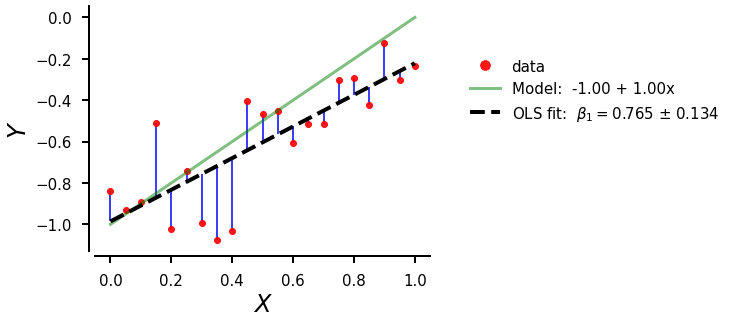

In [7]:
fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
half_frame(ax, "$X$", "$Y$", font_size = my_font_size)

# Plot data
#
ax.plot(x, y, 'ro', alpha = 0.9, label = 'data')

# Plot true functional dependence
#
ax.plot(x, beta_0 + x * beta_1,  linewidth = 3, alpha = 0.5, color = 'g',
          label = f'Model:  {beta_0:.2f} + {beta_1:.2f}x')

# Plot linear fit
#
ax.plot( x, results.params[0] + x * results.params[1], 
         '--', color = 'k', linewidth = 4, alpha = 1, 
         label = "OLS fit:  $\\beta_1 = $" + f"{results.params[1]:.3f}" + 
         " $\pm$ " + f"{results.bse[1]:.3f}")

# Plot estimated noise component in data
#
ax.vlines(x, y, results.params[0] + x * results.params[1], color = 'b')

# Format legend
ax.legend(loc = (1.1, 0.5), frameon = False, markerscale = 1.6, fontsize = my_font_size)
plt.show()

The object returned by `model.fit()` enables us to access all values returned by `model.fit().summary()` by calling specific attributed.  For example, point estimates for the coefficients of the linear fit are accessible through the attribute `params` (see label in code cell above).

A list of all attributes and methods can be found [here](https://www.statsmodels.org/0.8.0/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults).

The standard errors for the coefficient estimates can be retrieved with the attribute `bse` and the confidence intervals can be retrieved with `conf_int`, which returns a pandas `dataframe`. 

In [8]:
print(f"results.conf_int() is a {type(results.conf_int())}\n")
print(results.conf_int())

print(f"\nConfidence interval for beta_1 is [{results.conf_int()[0]['X']:.3f}, {results.conf_int()[1]['X']:.3f}]" )

results.conf_int() is a <class 'pandas.core.frame.DataFrame'>

                  0         1
Intercept -1.149955 -0.821678
X          0.483741  1.045357

Confidence interval for beta_1 is [0.484, 1.045]


In [9]:
results.conf_int(alpha = 0.01) # Default is alpha = 0.05

,0,1
Intercept,-1.210176,-0.761457
X,0.380715,1.148383


# Exploring impact of different types of association

Consider the cases:

1. $y = a + b~x^2~~~~~$ with $b \ll 1$ and $x \in [0,1]$

2. $y = a + b~x + c~x^2~~~~~$ with $ b \gg c$ and $x \in [0,1]$

1. $y = a + b~x^2~~~~~$ with $x \in [0,1]$

Now repeat the calculations shown above for each of those cases.  What can you learn?

What about the case when $\sigma_x \approx \sigma_y$?
